In [243]:
# !pip3 install sklearn

In [294]:
import pandas as pd
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt

import openpyxl
import seaborn as sns

import statistics
from scipy import stats
from scipy.stats import norm



In [295]:
df = pd.read_csv('heart_dataset.csv')

In [296]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [297]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [298]:
for col in df:
    print(f'{col} : {df[col].unique()}')

HeartDisease : ['No' 'Yes']
BMI : [16.6  20.34 26.58 ... 62.42 51.46 46.56]
Smoking : ['Yes' 'No']
AlcoholDrinking : ['No' 'Yes']
Stroke : ['No' 'Yes']
PhysicalHealth : [ 3.  0. 20. 28.  6. 15.  5. 30.  7.  1.  2. 21.  4. 10. 14. 18.  8. 25.
 16. 29. 27. 17. 24. 12. 23. 26. 22. 19.  9. 13. 11.]
MentalHealth : [30.  0.  2.  5. 15.  8.  4.  3. 10. 14. 20.  1.  7. 24.  9. 28. 16. 12.
  6. 25. 17. 18. 21. 29. 22. 13. 23. 27. 26. 11. 19.]
DiffWalking : ['No' 'Yes']
Sex : ['Female' 'Male']
AgeCategory : ['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race : ['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic : ['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity : ['Yes' 'No']
GenHealth : ['Very good' 'Fair' 'Good' 'Poor' 'Excellent']
SleepTime : [ 5.  7.  8.  6. 12.  4.  9. 10. 15.  3.  2.  1. 16. 18. 14. 20. 11. 13.
 17. 24. 19. 21. 22. 23.]
Asthma : ['Yes' 'No']

In [299]:
#Replace Yes = 1 and No = 0 for columns given

cols = ['HeartDisease','Smoking','AlcoholDrinking','Stroke','DiffWalking','Asthma','KidneyDisease','SkinCancer','PhysicalActivity']

df[cols] = df[cols].replace({'Yes': 1 , 'No': 0})

In [300]:
df['Sex'] = df['Sex'].replace({'Female': 1 , 'Male': 0})

In [301]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,White,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,White,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,White,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,White,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,White,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60-64,Hispanic,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35-39,Hispanic,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45-49,Hispanic,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25-29,Hispanic,No,0,Good,12.0,0,0,0


In [302]:
df.groupby('Race')['HeartDisease'].mean()

Race
American Indian/Alaskan Native    0.104191
Asian                             0.032970
Black                             0.075374
Hispanic                          0.052576
Other                             0.081076
White                             0.091786
Name: HeartDisease, dtype: float64

In [303]:
df.drop(columns = 'Race',inplace=True)

In [304]:
#Converted AgeCategory into lower bound of its category
df['AgeCategory'] = df['AgeCategory'].str[:2].astype(int)

In [305]:
df.GenHealth.unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [306]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [307]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,1,55,Yes,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,80,No,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65,Yes,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75,No,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,40,No,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60,Yes,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35,No,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45,No,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25,No,0,Good,12.0,0,0,0


In [308]:
# One Hot Encoding on GenHealth


df = pd.get_dummies(df, columns=['GenHealth','Diabetic'])

In [309]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,16.60,1,0,0,3.0,30.0,0,1,55,1,5.0,1,0,1,0,0,0,0,1,0,0,1,0
1,0,20.34,0,0,1,0.0,0.0,0,1,80,1,7.0,0,0,0,0,0,0,0,1,1,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,0,65,1,8.0,1,0,0,0,1,0,0,0,0,0,1,0
3,0,24.21,0,0,0,0.0,0.0,0,1,75,0,6.0,0,0,1,0,0,1,0,0,1,0,0,0
4,0,23.71,0,0,0,28.0,0.0,1,1,40,1,8.0,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,0,60,0,6.0,1,0,0,0,1,0,0,0,0,0,1,0
319791,0,29.84,1,0,0,0.0,0.0,0,0,35,1,5.0,1,0,0,0,0,0,0,1,1,0,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,1,45,1,6.0,0,0,0,0,0,1,0,0,1,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,1,25,0,12.0,0,0,0,0,0,1,0,0,1,0,0,0


In [310]:
df.dtypes

HeartDisease                          int64
BMI                                 float64
Smoking                               int64
AlcoholDrinking                       int64
Stroke                                int64
PhysicalHealth                      float64
MentalHealth                        float64
DiffWalking                           int64
Sex                                   int64
AgeCategory                           int32
PhysicalActivity                      int64
SleepTime                           float64
Asthma                                int64
KidneyDisease                         int64
SkinCancer                            int64
GenHealth_Excellent                   uint8
GenHealth_Fair                        uint8
GenHealth_Good                        uint8
GenHealth_Poor                        uint8
GenHealth_Very good                   uint8
Diabetic_No                           uint8
Diabetic_No, borderline diabetes      uint8
Diabetic_Yes                    

In [311]:
#Scaling Numeric Values 

sc = MinMaxScaler()
cols = ['BMI','PhysicalHealth','MentalHealth','SleepTime']

for col in cols:
    df[[col]] = sc.fit_transform(df[[col]])

In [312]:
pd.set_option('display.max_columns',40)

In [313]:
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0,0.055294,1,0,0,0.100000,1.0,0,1,55,1,0.173913,1,0,1,0,0,0,0,1,0,0,1,0
1,0,0.100447,0,0,1,0.000000,0.0,0,1,80,1,0.260870,0,0,0,0,0,0,0,1,1,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,0,65,1,0.304348,1,0,0,0,1,0,0,0,0,0,1,0
3,0,0.147169,0,0,0,0.000000,0.0,0,1,75,0,0.217391,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0.141132,0,0,0,0.933333,0.0,1,1,40,1,0.304348,0,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,0.185802,1,0,0,0.233333,0.0,1,0,60,0,0.217391,1,0,0,0,1,0,0,0,0,0,1,0
319791,0,0.215139,1,0,0,0.000000,0.0,0,0,35,1,0.173913,1,0,0,0,0,0,0,1,1,0,0,0
319792,0,0.147531,0,0,0,0.000000,0.0,0,1,45,1,0.217391,0,0,0,0,0,1,0,0,1,0,0,0
319793,0,0.250996,0,0,0,0.000000,0.0,0,1,25,0,0.478261,0,0,0,0,0,1,0,0,1,0,0,0


## Correlation Matrix and heatmap 

In [314]:
corr_matrix = df.corr().abs()

In [315]:
sns.set_theme()

In [316]:
sns.set(rc={'figure.figsize':(17,12)})
sns.set(rc={'figure.figsize':(17,12)})

<AxesSubplot:>

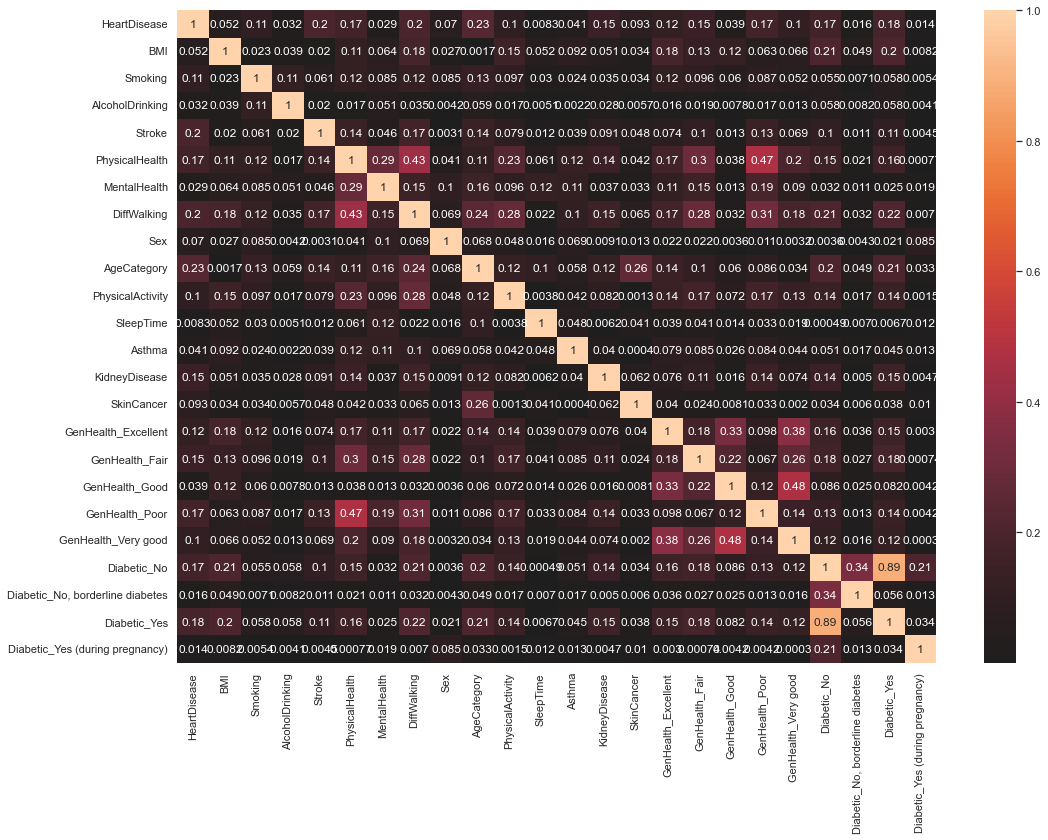

In [317]:
sns.heatmap(corr_matrix, center=0, annot=True)

In [318]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1) #features (independent variables)
y = df['HeartDisease'] #target (dependent variable)

In [319]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [320]:
df_train = X_train.copy(deep=True)

In [321]:
df_train['HeartDisease'] = y_train

In [322]:
df_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
95877,0.136545,1,0,0,0.000000,0.000000,0,0,75,1,0.260870,0,0,0,0,0,0,0,1,1,0,0,0,0
228939,0.186406,1,0,1,1.000000,0.000000,0,0,55,1,0.217391,0,0,0,0,0,1,0,0,1,0,0,0,1
260256,0.249547,0,0,0,0.066667,0.066667,0,0,50,0,0.304348,0,0,0,0,0,0,0,1,1,0,0,0,0
84785,0.233007,0,0,0,0.000000,0.000000,0,1,25,1,0.304348,0,0,0,1,0,0,0,0,1,0,0,0,0
83845,0.152240,1,0,0,0.066667,0.333333,0,0,80,1,0.260870,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,0.212846,0,0,0,0.000000,0.000000,0,0,60,0,0.304348,0,0,0,0,0,1,0,0,1,0,0,0,0
259178,0.369190,1,0,0,0.000000,0.166667,0,0,35,1,0.217391,0,0,0,0,0,1,0,0,1,0,0,0,0
131932,0.231438,1,0,0,0.400000,0.200000,0,0,65,0,0.304348,0,0,0,0,0,0,0,1,0,1,0,0,0
146867,0.123385,0,0,0,0.233333,0.166667,0,1,18,1,0.304348,0,0,0,1,0,0,0,0,1,0,0,0,0


C:\Users\onkar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

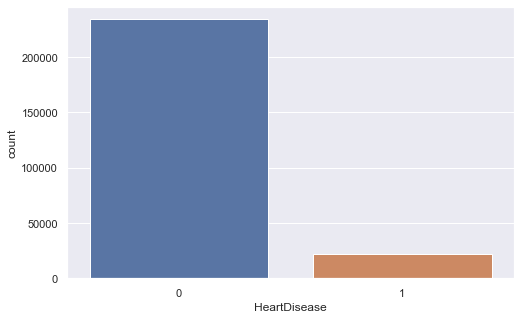

In [323]:
sns.set(rc={'figure.figsize':(8,5)})
sns.countplot('HeartDisease', data=df_train)

In [324]:
df_Yes = df_train[df_train['HeartDisease']==1]
df_No = df_train[df_train['HeartDisease']==0]

**By using df.sample**

In [325]:
df_Yes_upsampled = df_Yes.sample(n=len(df_No), replace=True, random_state=42)
len(df_Yes_upsampled)

234055

In [326]:
df_upsampled = df_No.append(df_Yes_upsampled).reset_index(drop=True)

C:\Users\onkar\AppData\Local\Temp\ipykernel_24080\73465579.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_upsampled = df_No.append(df_Yes_upsampled).reset_index(drop=True)


In [327]:
df_upsampled

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
0,0.136545,1,0,0,0.000000,0.000000,0,0,75,1,0.260870,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0.249547,0,0,0,0.066667,0.066667,0,0,50,0,0.304348,0,0,0,0,0,0,0,1,1,0,0,0,0
2,0.233007,0,0,0,0.000000,0.000000,0,1,25,1,0.304348,0,0,0,1,0,0,0,0,1,0,0,0,0
3,0.166003,0,0,0,0.233333,0.000000,0,0,50,1,0.217391,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.173488,0,0,0,0.000000,0.033333,0,0,30,1,0.217391,1,0,0,0,0,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468105,0.247857,1,0,1,0.000000,0.666667,1,0,50,0,0.217391,0,1,0,0,0,1,0,0,0,0,1,0,1
468106,0.090668,0,0,0,0.000000,0.066667,0,1,70,1,0.347826,0,1,0,0,1,0,0,0,0,0,1,0,1
468107,0.136183,1,0,0,0.500000,0.166667,0,1,60,1,0.217391,0,0,0,0,0,1,0,0,1,0,0,0,1
468108,0.157793,1,0,0,0.000000,0.033333,1,0,80,0,0.347826,0,0,1,0,0,1,0,0,1,0,0,0,1


In [328]:
X_train = df_upsampled.drop(['HeartDisease'], axis=1) #features (independent variables)
y_train = df_upsampled['HeartDisease'] #target (dependent variable)

**By using SMOTE**

In [329]:
# !pip3 install imbalanced-learn

In [355]:
from sklearn.model_selection import train_test_split

X = df.drop(['HeartDisease'], axis=1) #features (independent variables)
y = df['HeartDisease'] #target (dependent variable)

In [356]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [357]:
y_train.ravel()

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [358]:
y_train

95877     0
228939    1
260256    0
84785     0
83845     1
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: HeartDisease, Length: 255836, dtype: int64

In [359]:
from imblearn.over_sampling import SMOTE

In [360]:
# transform the dataset
oversample = SMOTE()
X_res, y_res = oversample.fit_resample(X_train, y_train.ravel())

In [361]:
df_smote = X_res.copy(deep=True)

In [362]:
df_smote['HeartDisease'] = y_res

In [363]:
df_smote

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Excellent,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),HeartDisease
0,0.136545,1,0,0,0.000000,0.000000,0,0,75,1,0.260870,0,0,0,0,0,0,0,1,1,0,0,0,0
1,0.186406,1,0,1,1.000000,0.000000,0,0,55,1,0.217391,0,0,0,0,0,1,0,0,1,0,0,0,1
2,0.249547,0,0,0,0.066667,0.066667,0,0,50,0,0.304348,0,0,0,0,0,0,0,1,1,0,0,0,0
3,0.233007,0,0,0,0.000000,0.000000,0,1,25,1,0.304348,0,0,0,1,0,0,0,0,1,0,0,0,0
4,0.152240,1,0,0,0.066667,0.333333,0,0,80,1,0.260870,0,0,0,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468105,0.198095,0,0,0,0.400631,0.000000,0,0,65,1,0.261281,0,0,0,0,0,1,0,0,1,0,0,0,1
468106,0.252315,0,0,0,0.065828,0.287152,0,1,50,0,0.304348,1,0,0,0,1,0,0,0,1,0,0,0,1
468107,0.191847,1,0,0,0.333333,0.536981,1,0,60,1,0.213757,0,0,0,0,1,0,0,0,1,0,0,0,1
468108,0.375707,1,0,0,0.079501,0.000000,1,1,70,1,0.283608,0,0,0,0,1,0,0,0,0,0,1,0,1


C:\Users\onkar\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

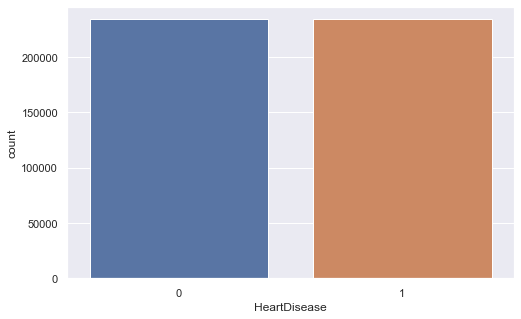

In [364]:
sns.countplot('HeartDisease', data=df_smote)

In [385]:
X_train = X_res

In [386]:
y_train = y_res

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score 

def PrintClassificationMetrics(y_true, y_pred):
    Metrics = [confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, roc_auc_score]
    print('  Confusion Matrix for Classification Problem is  :  \n\n ', confusion_matrix(y_true, y_pred))
    print('\n  Printing All of the metrics for Classification Problem :  \n')
    for i in range(1, len(Metrics)):
        score = Metrics[i](y_true, y_pred)
        print('{}.  {}  :  {}'.format(i, str(Metrics[i]), score))

# Decision Tree Classifier

In [387]:
from sklearn.tree import DecisionTreeClassifier

In [388]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth = 25)

In [389]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

In [390]:
# Training Scores

In [391]:
pred_train = model.predict(X_train)

In [392]:
PrintClassificationMetrics(y_train, pred_train)

  Confusion Matrix for Classification Problem is  :  

  [[224275   9780]
 [  6581 227474]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.9650488133131102
2.  <function precision_score at 0x00000188D0822290>  :  0.9587783556863109
3.  <function recall_score at 0x00000188D0822320>  :  0.9718826771485335
4.  <function f1_score at 0x00000188D0821F30>  :  0.9652860437632211
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.9650488133131102


In [393]:
# Testing Scores

In [394]:
pred_test = model.predict(X_test)

In [395]:
PrintClassificationMetrics(y_test, pred_test)

  Confusion Matrix for Classification Problem is  :  

  [[51059  7308]
 [ 3709  1883]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.8277490267202426
2.  <function precision_score at 0x00000188D0822290>  :  0.2048743335872049
3.  <function recall_score at 0x00000188D0822320>  :  0.3367310443490701
4.  <function f1_score at 0x00000188D0821F30>  :  0.25475208009199757
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.6057616535501411


In [224]:
# After doing criterion gini -> entropy
#     every metric score decreased
#     In confusion matrix, TP and TN decreased simultaneously FP and FN increased

In [225]:
# After doing criterion gini -> log_loss
#     every metric score decreased
#     In confusion matrix, TP and TN decreased simultaneously FP and FN increased

In [53]:
# After doing criterion log_loss -> entropy
#     every metric score increased little 
#     In confusion matrix, TP and TN increased simultaneously FP and FN decreased


# max_depth = 35 is the best for the model as the models scores goes down after that. 

# Gausian Naive Bayes Classifier 

In [405]:
from sklearn.naive_bayes import GaussianNB

In [406]:
GNB = GaussianNB()

In [407]:
GNB.fit(X_train, y_train)

GaussianNB()

In [408]:
# Training Scores

In [409]:
pred_train = GNB.predict(X_train)

In [410]:
PrintClassificationMetrics(y_train, pred_train)

  Confusion Matrix for Classification Problem is  :  

  [[176595  57460]
 [ 74257 159798]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.7186195552327445
2.  <function precision_score at 0x00000188D0822290>  :  0.7355218219812389
3.  <function recall_score at 0x00000188D0822320>  :  0.6827369635342121
4.  <function f1_score at 0x00000188D0821F30>  :  0.7081471174107549
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.7186195552327446


In [411]:
# Testing Scores

In [412]:
pred_test = GNB.predict(X_test)

In [413]:
PrintClassificationMetrics(y_test, pred_test)

  Confusion Matrix for Classification Problem is  :  

  [[43969 14398]
 [ 1791  3801]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.7468847230256883
2.  <function precision_score at 0x00000188D0822290>  :  0.20885762954008463
3.  <function recall_score at 0x00000188D0822320>  :  0.6797210300429185
4.  <function f1_score at 0x00000188D0821F30>  :  0.31953259635996806
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.7165202713906405


# Logistic Regresssion

In [414]:
from sklearn.linear_model import LogisticRegression

In [415]:
LR = LogisticRegression(max_iter = 250)

In [416]:
LR.fit(X_train, y_train)

C:\Users\onkar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=250)

In [417]:
# Training Scores

In [418]:
pred_train = LR.predict(X_train)

In [419]:
PrintClassificationMetrics(y_train, pred_train)

  Confusion Matrix for Classification Problem is  :  

  [[173269  60786]
 [ 49300 184755]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.7648287795603598
2.  <function precision_score at 0x00000188D0822290>  :  0.7524405292802424
3.  <function recall_score at 0x00000188D0822320>  :  0.7893657473670719
4.  <function f1_score at 0x00000188D0821F30>  :  0.7704609713175256
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.7648287795603598


In [420]:
# Testing Scores

In [421]:
pred_test = LR.predict(X_test)

In [422]:
PrintClassificationMetrics(y_test, pred_test)

  Confusion Matrix for Classification Problem is  :  

  [[43051 15316]
 [ 1289  4303]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.7403805562938758
2.  <function precision_score at 0x00000188D0822290>  :  0.2193282022529181
3.  <function recall_score at 0x00000188D0822320>  :  0.7694921316165951
4.  <function f1_score at 0x00000188D0821F30>  :  0.34135893062552064
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.7535417894192421


# K Nearest Neighbour Classifier

In [423]:
from sklearn.neighbors import KNeighborsClassifier

In [424]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [425]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [426]:
# Training Scores

In [427]:
pred_train = knn.predict(X_train)

In [428]:
PrintClassificationMetrics(y_train, pred_train)

  Confusion Matrix for Classification Problem is  :  

  [[214399  19656]
 [ 20809 213246]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.913556642669458
2.  <function precision_score at 0x00000188D0822290>  :  0.9156039879434269
3.  <function recall_score at 0x00000188D0822320>  :  0.9110935463886694
4.  <function f1_score at 0x00000188D0821F30>  :  0.9133431986242845
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.913556642669458


In [429]:
# Testing Scores

In [430]:
pred_test = knn.predict(X_test)

In [431]:
PrintClassificationMetrics(y_test, pred_test)

  Confusion Matrix for Classification Problem is  :  

  [[49350  9017]
 [ 3166  2426]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.8095185978517487
2.  <function precision_score at 0x00000188D0822290>  :  0.21200734073232544
3.  <function recall_score at 0x00000188D0822320>  :  0.43383404864091557
4.  <function f1_score at 0x00000188D0821F30>  :  0.28482535955385974
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.6396730337093247


# Random Forest Classifier

In [432]:
from sklearn.ensemble import RandomForestClassifier

In [433]:
clf_forest = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [434]:
#Training Accuracy
pred = clf_forest.predict(X_train)
PrintClassificationMetrics(y_train, pred_train)

  Confusion Matrix for Classification Problem is  :  

  [[214399  19656]
 [ 20809 213246]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.913556642669458
2.  <function precision_score at 0x00000188D0822290>  :  0.9156039879434269
3.  <function recall_score at 0x00000188D0822320>  :  0.9110935463886694
4.  <function f1_score at 0x00000188D0821F30>  :  0.9133431986242845
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.913556642669458


In [435]:
#Testing Accuracy
pred_test = clf_forest.predict(X_test)
PrintClassificationMetrics(y_test, pred_test)

  Confusion Matrix for Classification Problem is  :  

  [[43918 14449]
 [ 1447  4145]]

  Printing All of the metrics for Classification Problem :  

1.  <function accuracy_score at 0x00000188D0821B40>  :  0.7514657827670852
2.  <function precision_score at 0x00000188D0822290>  :  0.2229213724857481
3.  <function recall_score at 0x00000188D0822320>  :  0.7412374821173104
4.  <function f1_score at 0x00000188D0821F30>  :  0.3427602745389895
5.  <function roc_auc_score at 0x00000188D0820AF0>  :  0.7468416067190455


In [436]:
#confusion matrix,  all metrics, recall, precision, f1 score, balanced accuracy, roc auc score
#Decision tree, hyperparameter tuning , confusion matrix
#

In [437]:
#Hyper Parameter Tuning (Manual)

In [78]:
# clf_forest = RandomForestClassifier(n_estimators=70, max_depth=25)
# clf_forest.fit(X_train, y_train)

In [79]:
# #Training Accuracy
# pred = clf_forest.predict(X_train)
# accuracy_score(y_train, pred)

In [80]:
# #Testing Accuracy
# pred_test = clf_forest.predict(X_test)
# accuracy_score(y_test, pred_test)

# Hyper parameter tuning using GridSearchCV

In [81]:
# from sklearn.model_selection import GridSearchCV


In [82]:
# parameters = {'n_estimators':[50,70,90], 'max_depth':[10,15,20,25]}
# forest = RandomForestClassifier()
# clf = GridSearchCV(estimator=forest, param_grid=parameters, n_jobs=-1, cv=5)

In [83]:
# clf.fit(X, y)

In [84]:
# clf.best_params_


In [85]:
# clf.best_score_
